In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import variation


In [2]:
# creating a function to return CV array
def CV_row(df):   
    i=0;
    CV=[]
    numeric_col_names=numeric_datatype_df(df)

    for i in df.columns:
        if (i in numeric_col_names):
            CV_val=  round(variation(df[i]),2)
            CV.append(CV_val)

    return CV    

In [3]:
# creating a function to return skew array
def Skew_row(df):   
    i=0;
    Skew=[]
    numeric_col_names=numeric_datatype_df(df)
    for i in df.columns:
        if (i in numeric_col_names):
            Skew_val=  round(df[i].skew(),2)
            Skew.append(Skew_val)
    return Skew   

In [4]:
# creating a function to return CV, skew, IQR, Upper range, lower range of dataframe
def CV_row(df):   
    i=0;
    CV=[]
    Skew=[]
    IQR=[]
    UR=[]
    LR=[]
    numeric_col_names=numeric_datatype_df(df)
    for i in df.columns:
        if (i in numeric_col_names):
            CV.append(round(variation(df[i]),2))
            Skew.append(round(df[i].skew(),2))
            IQR_val, lower_range, upper_range = return_IQR_LR_UR(df[i])
            IQR.append(round(IQR_val,2))
            UR.append(round(upper_range,2))
            LR.append(round(lower_range,2))

    return CV, Skew, IQR,  UR, LR    


In [5]:
# creating a function which will return the array of column names for integers/float data type only
def numeric_datatype_df(df):  
    df_dtype=pd.DataFrame(df.dtypes)
    df_dtype.reset_index(inplace =True)
    df_dtype.rename(columns ={'index':'Col_names', 0:'dtype'}, inplace =True)
    df1_dtype_numeric=df_dtype[(df_dtype['dtype']=='float64') | (df_dtype['dtype']=='int64') | (df_dtype['dtype']=='int8')]
    return np.array(df1_dtype_numeric.Col_names)

In [6]:
def calc_rows(Col_list,no_of_graph_row):  
    if (len(Col_list) % no_of_graph_row == 0):
        rows= len(Col_list) / no_of_graph_row
    else:
        rows= len(Col_list) / no_of_graph_row + 1
    return rows

In [7]:
## Using User definition to return IQR, LR, UR for a column
def return_IQR_LR_UR(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return IQR, lower_range, upper_range

In [8]:
# Check for missing value in any colum
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum() * 100/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe


# 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

## Read the data into the notebook


In [1]:
# from google.colab import files
# data_to_upload = files.upload()

In [ ]:
import io


In [11]:
# df_train = pd.read_csv(io.BytesIO(data_to_upload['train_ctrUa4K.csv']))

In [ ]:
# data_to_upload = files.upload()

In [13]:
# df_test = pd.read_csv(io.BytesIO(data_to_upload['test_lAUu6dG.csv']))

In [10]:
df_train= pd.read_csv('train_ctrUa4K.csv')
df_test= pd.read_csv('test_lAUu6dG.csv')

In [11]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
df_train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [13]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [14]:
df_test.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


## Exploratory Data Analysis 
 ## Checking the data types /information


In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Checking for missing values

In [16]:
# Check for missing value in any colum
# user defined function already defined in problem 1
missing_check(df_train)

,Total,Percent
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Loan_ID,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


We can confirm that there is NULL value

## Checking the shape (Number of rows and columns)

In [17]:
df_train.shape

(614, 13)

## Checking for duplicates

In [18]:
# Check for duplicate data

dups = df_train.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df_train[dups]

Number of duplicate rows = 0


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


# Univariate Analysis

## Checking for summary

In [19]:
df_train_summ=pd.DataFrame(df_train.describe().round(2))
df_train.describe(include='all')


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002777,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


## Checking IQR, Coeffiecient of Variation, IQR, lower range and upper range of numerical cols

In [20]:
df_train_summ.loc["CV"],df_train_summ.loc["Skew"],df_train_summ.loc["IQR"],df_train_summ.loc["UR"],df_train_summ.loc["LR"]= CV_row(df_train)

In [21]:
df_train_summ.round(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.00,614.00,592.00,600.00,564.00
mean,5403.46,1621.25,146.41,342.00,0.84
std,6109.04,2926.25,85.59,65.12,0.36
min,150.00,0.00,9.00,12.00,0.00
25%,2877.50,0.00,100.00,360.00,1.00
50%,3812.50,1188.50,128.00,360.00,1.00
75%,5795.00,2297.25,168.00,360.00,1.00
max,81000.00,41667.00,700.00,480.00,1.00
CV,1.13,1.80,NaN,NaN,NaN
Skew,6.54,7.49,2.68,-2.36,-1.88


## Check for Outliers (Which all variables have an outlier?)

In [22]:
df_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

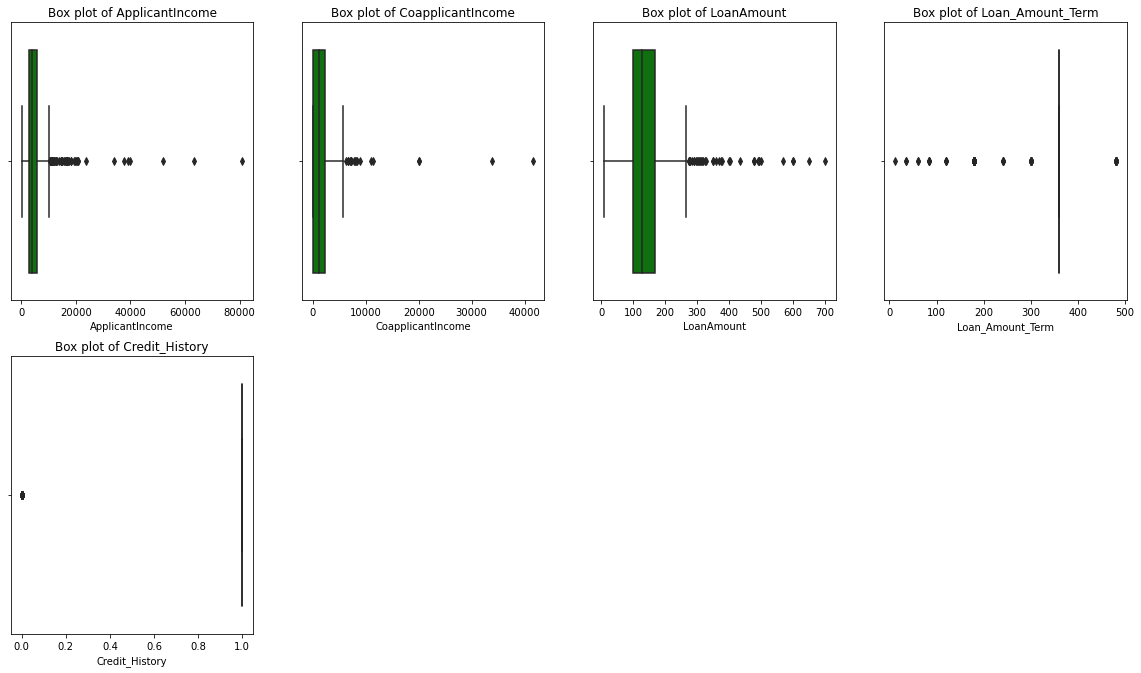

In [23]:
# Checking for Outliers
numeric_col_names=numeric_datatype_df(df_train)
no_of_graphs_rows=4
rows=calc_rows(numeric_col_names, no_of_graphs_rows)
    
plt.figure(figsize= (20,5*rows))
box_plot_no=1
for col in df_train.columns :
#    if (col in numeric_col_names):
    if (df_train[col].dtype == 'int64') | (df_train[col].dtype == 'float64'):
        box_plot_title = "Box plot of " + col
        plt.subplot(rows,no_of_graphs_rows,box_plot_no)
        sns.boxplot(x= col,data =df_train ,color='green').set(title =box_plot_title)
        box_plot_no = box_plot_no + 1 


We can confirm visually from box plots that there are outliers in all the four numeric columns.

## Plot the Histograms

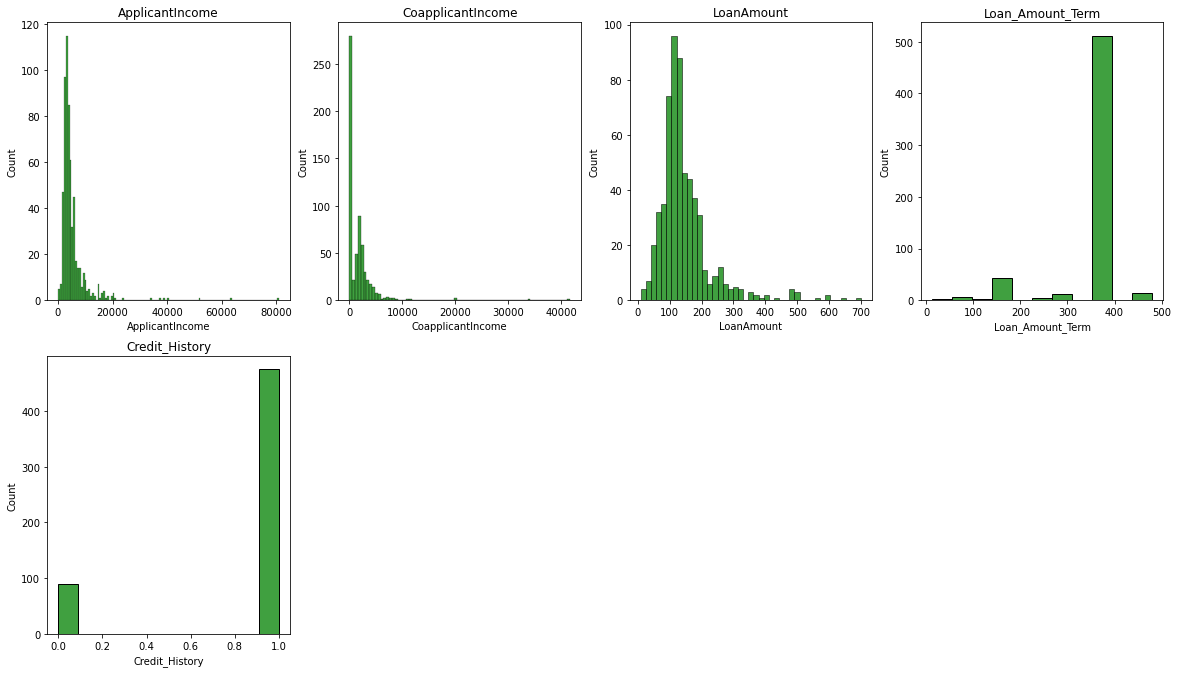

In [24]:
#Plots to see the distribution of the continuous features individually
plt.figure(figsize= (20,5*rows))
distplot_no=1
for col in df_train.columns :
    if (col in numeric_col_names):
        distplot_title = col
        plt.subplot(rows,no_of_graphs_rows,distplot_no)
        sns.histplot(df_train[col] ,color='green').set(title =distplot_title)
        distplot_no = distplot_no + 1 


## Replacing Null values with median (outliers case) and mode (categorical variables)

In [25]:
# user defined function already defined in problem 1
missing_check(df_train)

,Total,Percent
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Loan_ID,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


In [26]:
df_train["Credit_History"].replace(np.nan,df_train["Credit_History"].mode().values[0],inplace=True)

In [27]:
df_train["Self_Employed"].replace(np.nan,df_train["Self_Employed"].mode().values[0],inplace=True)

In [28]:
#LoanAmount
df_train["LoanAmount"].replace(np.nan,df_train["LoanAmount"].median(),inplace=True)

In [29]:
df_train["Dependents"].replace(np.nan,df_train["Dependents"].mode().values[0],inplace=True)

In [30]:
#Loan_Amount_Term :- its like categorical variable. so using mode
df_train["Loan_Amount_Term"].replace(np.nan,df_train["Loan_Amount_Term"].mode().values[0],inplace=True)

In [31]:
df_train["Gender"].replace(np.nan,df_train["Gender"].mode().values[0],inplace=True)

In [32]:
df_train["Married"].replace(np.nan,df_train["Married"].mode().values[0],inplace=True)

In [33]:
missing_check(df_train)

,Total,Percent
Loan_ID,0,0.0
Gender,0,0.0
Married,0,0.0
Dependents,0,0.0
Education,0,0.0
Self_Employed,0,0.0
ApplicantIncome,0,0.0
CoapplicantIncome,0,0.0
LoanAmount,0,0.0
Loan_Amount_Term,0,0.0


# Bi-variate, and multivariate analysis

### Correlation matrix

In [34]:
Cor=df_train.corr().round(2)
Cor

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.00,-0.12,0.57,-0.05,-0.02
CoapplicantIncome,-0.12,1.00,0.19,-0.06,0.01
LoanAmount,0.57,0.19,1.00,0.04,-0.00
Loan_Amount_Term,-0.05,-0.06,0.04,1.00,-0.00
Credit_History,-0.02,0.01,-0.00,-0.00,1.00


### Heat Map

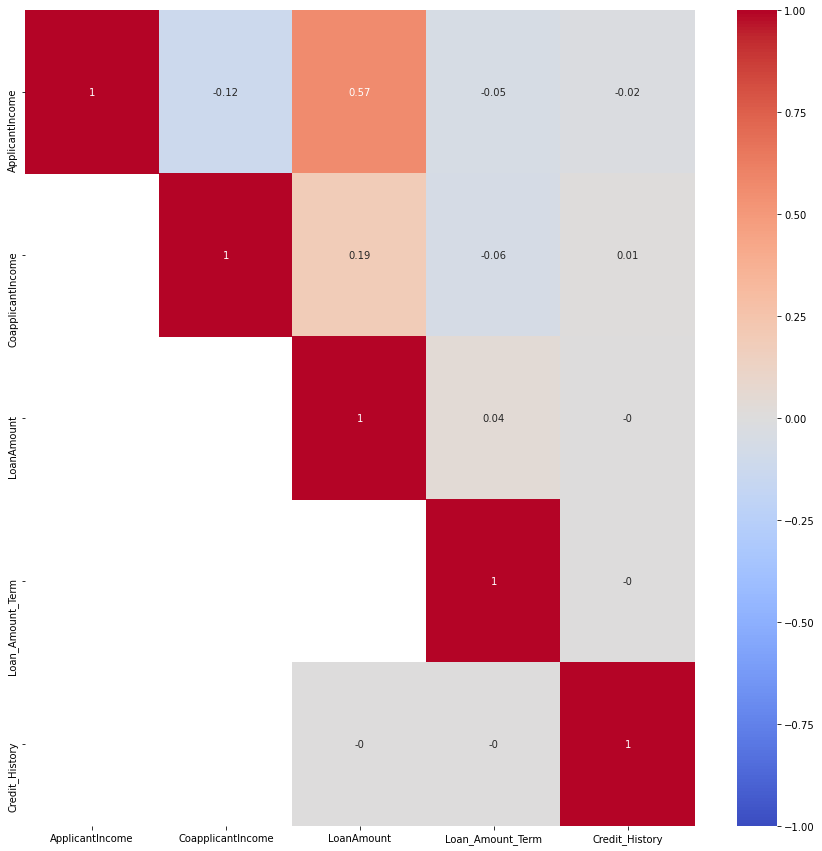

In [35]:
# plot the correlation coefficients as a heatmap
## Correlation Matrix
plt.figure(figsize=(15 ,15))
mask = np.array(Cor)
mask[np.triu_indices_from(mask)] =False
sns.heatmap(data =Cor, annot =True, mask =mask,vmax =1, vmin=-1, cmap ='coolwarm');

In [36]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


## Checking for missing values

In [37]:
# Check for missing value in any colum
# user defined function already defined in problem 1
missing_check(df_test)

,Total,Percent
Credit_History,29,7.901907
Self_Employed,23,6.267030
Gender,11,2.997275
Dependents,10,2.724796
Loan_Amount_Term,6,1.634877
LoanAmount,5,1.362398
Loan_ID,0,0.000000
Married,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


## Checking the shape (Number of rows and columns)

In [38]:
df_test.shape

(367, 12)

## Checking for duplicates

In [39]:
# Check for duplicate data

dups = df_test.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df_test[dups]

Number of duplicate rows = 0


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area


# Univariate Analysis

## Checking for summary

In [40]:
df_test_summ=pd.DataFrame(df_train.describe().round(2))
df_test.describe(include='all')


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,367,356,367,357,367,344,367.000000,367.000000,362.000000,361.000000,338.000000,367
unique,367,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3
top,LP001312,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Urban
freq,1,286,233,200,283,307,NaN,NaN,NaN,NaN,NaN,140
mean,NaN,NaN,NaN,NaN,NaN,NaN,4805.599455,1569.577657,136.132597,342.537396,0.825444,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4910.685399,2334.232099,61.366652,65.156643,0.380150,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,28.000000,6.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2864.000000,0.000000,100.250000,360.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3786.000000,1025.000000,125.000000,360.000000,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5060.000000,2430.500000,158.000000,360.000000,1.000000,NaN


## Check for Outliers (Which all variables have an outlier?)

In [41]:
df_test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

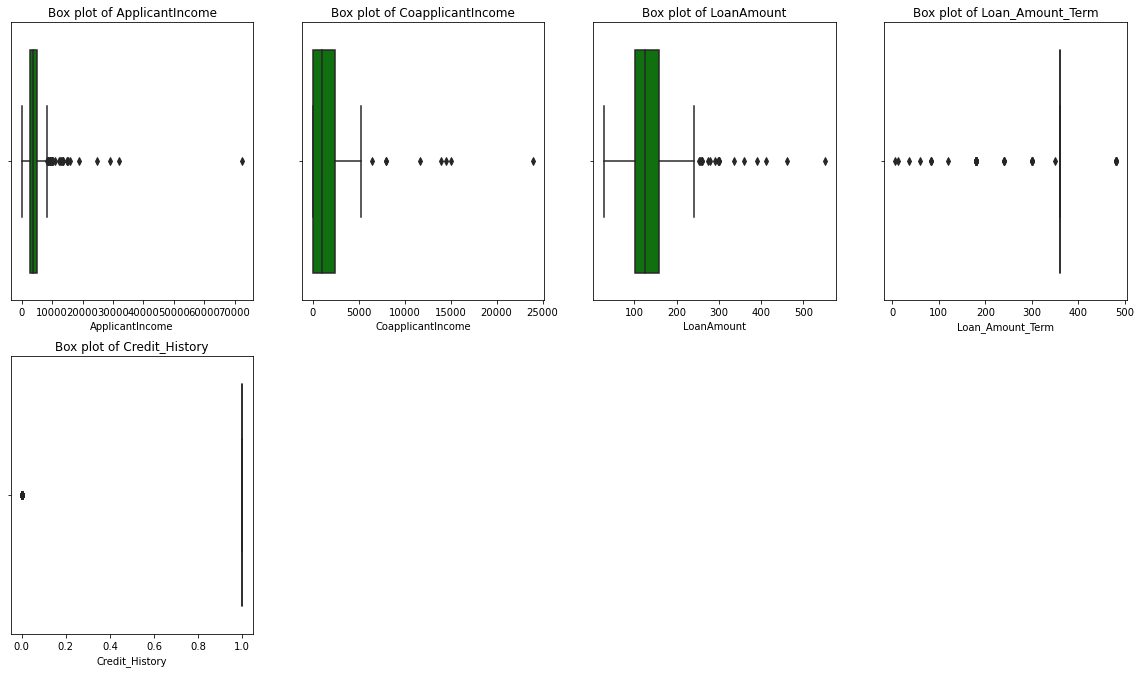

In [42]:
# Checking for Outliers
numeric_col_names=numeric_datatype_df(df_test)
no_of_graphs_rows=4
rows=calc_rows(numeric_col_names, no_of_graphs_rows)
    
plt.figure(figsize= (20,5*rows))
box_plot_no=1
for col in df_test.columns :
#    if (col in numeric_col_names):
    if (df_test[col].dtype == 'int64') | (df_test[col].dtype == 'float64'):
        box_plot_title = "Box plot of " + col
        plt.subplot(rows,no_of_graphs_rows,box_plot_no)
        sns.boxplot(x= col,data =df_test ,color='green').set(title =box_plot_title)
        box_plot_no = box_plot_no + 1 


We can confirm visually from box plots that there are outliers in all the four numeric columns.

## Plot the Histograms

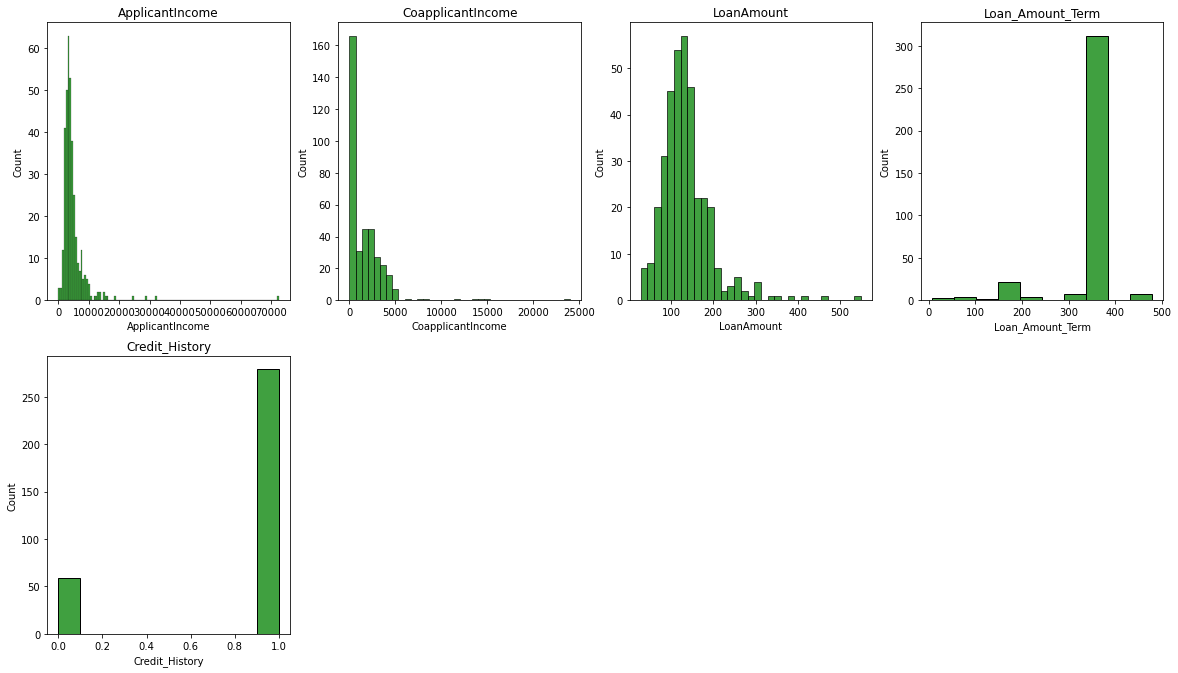

In [43]:
#Plots to see the distribution of the continuous features individually
plt.figure(figsize= (20,5*rows))
distplot_no=1
for col in df_test.columns :
    if (col in numeric_col_names):
        distplot_title = col
        plt.subplot(rows,no_of_graphs_rows,distplot_no)
        sns.histplot(df_test[col] ,color='green').set(title =distplot_title)
        distplot_no = distplot_no + 1 


In [44]:
# user defined function already defined in problem 1
missing_check(df_test)

,Total,Percent
Credit_History,29,7.901907
Self_Employed,23,6.267030
Gender,11,2.997275
Dependents,10,2.724796
Loan_Amount_Term,6,1.634877
LoanAmount,5,1.362398
Loan_ID,0,0.000000
Married,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


## Replacing Null values with median (outliers case) and mode (categorical variables)

In [45]:
df_test["Credit_History"].replace(np.nan,df_test["Credit_History"].mode().values[0],inplace=True)

In [46]:
df_test["Self_Employed"].replace(np.nan,df_test["Self_Employed"].mode().values[0],inplace=True)

In [47]:
#LoanAmount
df_test["LoanAmount"].replace(np.nan,df_test["LoanAmount"].median(),inplace=True)

In [48]:
df_test["Dependents"].replace(np.nan,df_test["Dependents"].mode().values[0],inplace=True)

In [49]:
#Loan_Amount_Term :- its like categorical variable. so using mode
df_test["Loan_Amount_Term"].replace(np.nan,df_test["Loan_Amount_Term"].mode().values[0],inplace=True)

In [50]:
df_test["Gender"].replace(np.nan,df_test["Gender"].mode().values[0],inplace=True)

In [51]:
df_test["Married"].replace(np.nan,df_test["Married"].mode().values[0],inplace=True)

In [52]:
missing_check(df_test)

,Total,Percent
Loan_ID,0,0.0
Gender,0,0.0
Married,0,0.0
Dependents,0,0.0
Education,0,0.0
Self_Employed,0,0.0
ApplicantIncome,0,0.0
CoapplicantIncome,0,0.0
LoanAmount,0,0.0
Loan_Amount_Term,0,0.0


# 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network


In [53]:
# taking a backup of df2 dataframe
df_train_bkp = df_train.copy(deep=True)
df_train_bkp.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [54]:
df_test_bkp = df_test.copy(deep=True)
df_test_bkp.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [55]:
df_test_bkp.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


## Converting Object into int
Decision tree in Python can take only numerical / categorical colums. It cannot take string / object types.

In [56]:
col_name =[] 
act_val = []
coded_val = []
for feature in df_train.drop(["Loan_ID"], axis=1).columns: 
    print ('feature:',feature,',dtype:',df_train[feature].dtype)
    if df_train[feature].dtype == 'object' :
        i=0
        while (i<pd.Categorical(df_train[feature].unique()).size):           
            act_val.append(df_train[feature].unique()[i])
            coded_val.append(str(pd.Categorical(df_train[feature].unique()).codes[i]))
            col_name.append(feature)
            i=i+1
        df_train[feature] = pd.Categorical(df_train[feature]).codes



feature: Gender ,dtype: object
feature: Married ,dtype: object
feature: Dependents ,dtype: object
feature: Education ,dtype: object
feature: Self_Employed ,dtype: object
feature: ApplicantIncome ,dtype: int64
feature: CoapplicantIncome ,dtype: float64
feature: LoanAmount ,dtype: float64
feature: Loan_Amount_Term ,dtype: float64
feature: Credit_History ,dtype: float64
feature: Property_Area ,dtype: object
feature: Loan_Status ,dtype: object


In [57]:
# creating a dataframe showing the mapping for future reference        
data = {"col_name": col_name, 
        "actual_value": act_val, 
        "coded_value": coded_val} 
  
df_train_map = pd.DataFrame(data)
df_train_map.sort_values(by=['col_name', 'coded_value'])


,col_name,actual_value,coded_value
4,Dependents,0,0
5,Dependents,1,1
6,Dependents,2,2
7,Dependents,3+,3
8,Education,Graduate,0
9,Education,Not Graduate,1
1,Gender,Female,0
0,Gender,Male,1
16,Loan_Status,N,0
15,Loan_Status,Y,1


In [58]:
df_train_map.col_name.value_counts()

Dependents       4
Property_Area    3
Self_Employed    2
Loan_Status      2
Education        2
Gender           2
Married          2
Name: col_name, dtype: int64

In [59]:
col_name =[] 
act_val = []
coded_val = []
for feature in df_test.drop(["Loan_ID"], axis=1).columns: 
    print ('feature:',feature,',dtype:',df_train[feature].dtype)        
    if df_test[feature].dtype == 'object':    
        i=0
        while (i<pd.Categorical(df_test[feature].unique()).size):           
            act_val.append(df_test[feature].unique()[i])
            coded_val.append(str(pd.Categorical(df_test[feature].unique()).codes[i]))
            col_name.append(feature)
            i=i+1
        df_test[feature] = pd.Categorical(df_test[feature]).codes



feature: Gender ,dtype: int8
feature: Married ,dtype: int8
feature: Dependents ,dtype: int8
feature: Education ,dtype: int8
feature: Self_Employed ,dtype: int8
feature: ApplicantIncome ,dtype: int64
feature: CoapplicantIncome ,dtype: float64
feature: LoanAmount ,dtype: float64
feature: Loan_Amount_Term ,dtype: float64
feature: Credit_History ,dtype: float64
feature: Property_Area ,dtype: int8


In [60]:
# creating a dataframe showing the mapping for future reference        
data = {"col_name": col_name, 
        "actual_value": act_val, 
        "coded_value": coded_val} 
  
df_test_map = pd.DataFrame(data)
df_test_map.sort_values(by=['col_name', 'coded_value'])


,col_name,actual_value,coded_value
4,Dependents,0,0
5,Dependents,1,1
6,Dependents,2,2
7,Dependents,3+,3
8,Education,Graduate,0
9,Education,Not Graduate,1
1,Gender,Female,0
0,Gender,Male,1
3,Married,No,0
2,Married,Yes,1


In [61]:
for col in df_train_map["col_name"].unique() :
        print ("Proportion of", col, "(in %)")
        print ((df_train[col].value_counts(normalize=True).round(2)*100).to_string())
        print ("\n")


Proportion of Gender (in %)
1    82.0
0    18.0


Proportion of Married (in %)
1    65.0
0    35.0


Proportion of Dependents (in %)
0    59.0
1    17.0
2    16.0
3     8.0


Proportion of Education (in %)
0    78.0
1    22.0


Proportion of Self_Employed (in %)
0    87.0
1    13.0


Proportion of Property_Area (in %)
1    38.0
2    33.0
0    29.0


Proportion of Loan_Status (in %)
1    69.0
0    31.0




In [62]:
for col in df_test_map["col_name"].unique() :
        print ("Proportion of", col, "(in %)")
        print ((df_test[col].value_counts(normalize=True).round(2)*100).to_string())
        print ("\n")


Proportion of Gender (in %)
1    81.0
0    19.0


Proportion of Married (in %)
1    63.0
0    37.0


Proportion of Dependents (in %)
0    57.0
2    16.0
1    16.0
3    11.0


Proportion of Education (in %)
0    77.0
1    23.0


Proportion of Self_Employed (in %)
0    90.0
1    10.0


Proportion of Property_Area (in %)
2    38.0
1    32.0
0    30.0




Label Encoding has been done and all columns are converted to number

### Proportion of 1s and 0s in Target Variable

In [63]:
df_train.Loan_Status.value_counts(normalize=True).round(2)*100

1    69.0
0    31.0
Name: Loan_Status, dtype: float64

This target variable is slightly imbalanced

## Builing CART Model

In [64]:
from sklearn.tree import DecisionTreeClassifier

## Extracting the target column into separate vectors for training set and test set

In [65]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [66]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3,1,1,4009,1777,113.0,360.0,1.0,2
363,LP002975,1,1,0,0,0,4158,709,115.0,360.0,1.0,2
364,LP002980,1,0,0,0,0,3250,1993,126.0,360.0,1.0,1
365,LP002986,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0


In [67]:
df_train["Total_Income"] = df_train["ApplicantIncome"] + df_train["CoapplicantIncome"]
df_test["Total_Income"] = df_test["ApplicantIncome"] + df_test["CoapplicantIncome"]

In [68]:
df_train["EMI"] = df_train["LoanAmount"] / df_train["Loan_Amount_Term"]
df_test["EMI"] = df_test["LoanAmount"] / df_test["Loan_Amount_Term"]

In [69]:
df_train["Balance_Income"] = df_train["Total_Income"]  - (df_train["EMI"]*1000)
df_test["Balance_Income"] = df_test["Total_Income"]  -  (df_test["EMI"]*1000)

In [70]:
df_train['total_income_by_loanAmt'] = df_train['Total_Income'] / df_train_bkp['LoanAmount']
df_test['total_income_by_loanAmt'] = df_test['Total_Income'] / df_test_bkp['LoanAmount']


In [71]:
df_train['ApplicantIncome_by_loanAmt'] = df_train_bkp['ApplicantIncome'] / df_train_bkp['LoanAmount']
df_test['ApplicantIncome_by_loanAmt'] = df_test_bkp['ApplicantIncome'] / df_test_bkp['LoanAmount']


In [72]:
df_train = df_train.drop(["ApplicantIncome","Balance_Income","Total_Income","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)
#df_train = df_train.drop(["Balance_Income","Total_Income"],axis=1)

In [73]:
df_test = df_test.drop(["ApplicantIncome","Balance_Income","Total_Income","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)

In [74]:
# df_test = df_test.drop(["Balance_Income","Total_Income"],axis=1)

In [75]:
X = df_train.drop(["Loan_ID", "Loan_Status"], axis=1)

Y = df_train.pop("Loan_Status")

X.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,EMI,total_income_by_loanAmt,ApplicantIncome_by_loanAmt
0,1,0,0,0,0,1.0,2,0.355556,45.695312,45.695312
1,1,1,1,0,0,1.0,0,0.355556,47.585938,35.804688
2,1,1,0,0,1,1.0,2,0.183333,45.454545,45.454545
3,1,1,0,1,0,1.0,2,0.333333,41.175000,21.525000
4,1,0,0,0,0,1.0,2,0.391667,42.553191,42.553191


### Splitting data into training and test set

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_validate, train_labels, validate_labels = train_test_split(X, Y, test_size=.30, random_state=1)
X_train = X
train_labels = Y
X_test = df_test.drop(["Loan_ID"], axis=1)

### Checking the dimensions of the training and test data

In [77]:
print('X_train',X_train.shape)
print('X_validate',X_validate.shape)
print('train_labels',train_labels.shape)
print('validate_labels',validate_labels.shape)

#print('test_labels',test_labels.shape)
print('X_test',X_test.shape)
print('Total Observations',df_train.shape[0] + df_test.shape[0] )

X_train (614, 10)
X_validate (185, 10)
train_labels (614,)
validate_labels (185,)
X_test (367, 10)
Total Observations 981


### Building a Decision Tree Classifier

In [78]:
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [79]:
# Fit the model
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [80]:
from sklearn import tree

train_char_label = ['No', 'Yes']
df2_Tree_File = open('df2_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=df2_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

df2_Tree_File.close()


The above code will save a .dot file in the working directory. 
WebGraphviz is Graphviz in the Browser.   
we can copy paste the contents of the file into the link below to get the visualization     
http://webgraphviz.com/

In [81]:
dt_model.score(X_train,train_labels)

1.0

In [82]:
#dt_model.score(X_test,test_labels)

### Regularising the Decision Tree


#### Importing libraries

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


#### creating user define function so to run CART model multiple times for different grid search parameters

In [84]:
def run_gridsearch(model,param_grid,X_train, train_labels,cv_value=5,scoring_value='accuracy'):
    grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = cv_value, n_jobs =-1,scoring=scoring_value)
    print ("\n Running grid search\n")
    grid_search.fit(X_train, train_labels)
    print ("\n Showing best parameters for the grid search\n")
    print (grid_search.best_params_)
    return grid_search

In [85]:
def check_performance(grid_search,X_train, X_test, train_labels,test_labels):
    best_grid = grid_search.best_estimator_
    ytrain_predict = best_grid.predict(X_train)
    ytest_predict = best_grid.predict(X_test)
    print("\n Classification Report for Train dataset\n")
    print(classification_report(train_labels,ytrain_predict))
    print("\n Classification Report for Validate dataset\n")
    print(classification_report(test_labels,ytest_predict))

#### using SKlearn grid search

 Initially we need to assume values of search grid parameters. 
 
 In decision tree visualization , we can see that tree has overgrown to about 25-26 depth, hence we are taking max_depth as [7 13 20]
 
 min_samples_leaf is normally taken around 1-3% of observations , hence taking it as [30 60 90]
 
 min_samples_split is normally 3 times min_samples_leaf, hence taking it as [90 180 270].
 
 CV parameter is taken as 10 (10 cross fold validation)

In [86]:
dt_model = DecisionTreeClassifier(random_state=1)
cv_value = 10
scoring_value = 'accuracy'
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [50, 100, 160],
    'min_samples_split': [150, 300, 500]
}

In [87]:
grid_search = run_gridsearch(dt_model,param_grid,X_train, train_labels,cv_value)


 Running grid search


 Showing best parameters for the grid search

{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 150}


In [88]:
check_performance(grid_search,X_train, X_validate, train_labels,validate_labels)


 Classification Report for Train dataset

              precision    recall  f1-score   support

           0       0.92      0.43      0.58       192
           1       0.79      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.86      0.71      0.73       614
weighted avg       0.83      0.81      0.78       614


 Classification Report for Validate dataset

              precision    recall  f1-score   support

           0       0.92      0.39      0.55        61
           1       0.77      0.98      0.86       124

    accuracy                           0.79       185
   macro avg       0.85      0.69      0.71       185
weighted avg       0.82      0.79      0.76       185



#### Pruning the grid seach parameters again

In [89]:
param_grid = {
    'max_depth': [2,4,5,6],
    'min_samples_leaf': [24,25,26 ],
    'min_samples_split': [99,100,101]
}
grid_search = run_gridsearch(dt_model,param_grid,X_train, train_labels,cv_value)
check_performance(grid_search,X_train, X_validate, train_labels,validate_labels)


 Running grid search


 Showing best parameters for the grid search

{'max_depth': 2, 'min_samples_leaf': 24, 'min_samples_split': 99}

 Classification Report for Train dataset

              precision    recall  f1-score   support

           0       0.86      0.51      0.64       192
           1       0.81      0.96      0.88       422

    accuracy                           0.82       614
   macro avg       0.83      0.73      0.76       614
weighted avg       0.83      0.82      0.80       614


 Classification Report for Validate dataset

              precision    recall  f1-score   support

           0       0.91      0.48      0.62        61
           1       0.79      0.98      0.87       124

    accuracy                           0.81       185
   macro avg       0.85      0.73      0.75       185
weighted avg       0.83      0.81      0.79       185



#### Saving the results of best search grid 

In [90]:
best_grid_CART = grid_search.best_estimator_
ytrain_predict_CART = best_grid_CART.predict(X_train)
ytest_predict_CART = best_grid_CART.predict(X_test)


### Generating New Tree

In [91]:
df2_tree_regularized = open('df2_tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid_CART, out_file= df2_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

df2_tree_regularized.close()
dot_data

### Variable Importance

In [92]:
df2_fi=pd.DataFrame(best_grid_CART.feature_importances_*100, columns = ["Important Feature"], index = X_train.columns).sort_values('Important Feature',ascending=False)
df2_fi

,Important Feature
Credit_History,89.880401
total_income_by_loanAmt,10.119599
Gender,0.000000
Married,0.000000
Dependents,0.000000
Education,0.000000
Self_Employed,0.000000
Property_Area,0.000000
EMI,0.000000
ApplicantIncome_by_loanAmt,0.000000


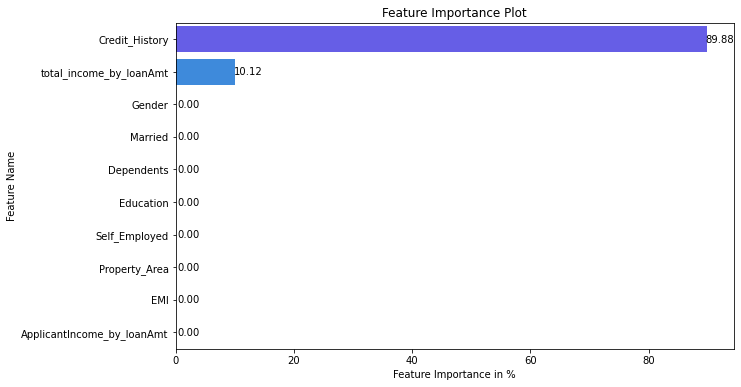

In [93]:
plt.figure(figsize=(10,6))
plots=sns.barplot(data=df2_fi,x="Important Feature",y=df2_fi.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')

# Iterrating over the bars one-by-one 
for bar in plots.patches: 
      #print ('bar_width:', format(bar.get_width(), '.2f'),'bar_height:' , bar.get_height(), 'get_x:', bar.get_x() ,'get_y', bar.get_y() )
      plots.annotate(format(bar.get_width(), '.2f'), (bar.get_width() , bar.get_y() + bar.get_height()/2),
                   ha='center', va='center', 
                   size=10, xytext=(13, 0), 
                   textcoords='offset points') 
plt.show()

#### As per this model, attributes like Type, Commission, Channel and Destination have no imortance in predicting the insurance claims

## Model Evaluation

### Model Score

#### Model score for the Training Data

In [94]:
#Train Data Accuracy
cart_train_acc=best_grid_CART.score(X_train,train_labels)
cart_train_acc

0.8192182410423453

#### Model score for the Testing Data

In [95]:
#Test Data Accuracy
# cart_test_acc=best_grid.score(X_test,test_labels)
# cart_test_acc

### Measuring AUC-ROC Curve

In [96]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [97]:
# creating user define function for calculating AUC and plotting the ROC curve
def calc_AUC_ROC_curve(probs,labels):
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC   
    auc = roc_auc_score(labels, probs)
    print('AUC: %.3f' % auc)
    # calculate roc curve   
    fpr, tpr, thresholds = roc_curve(labels, probs)
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the plot
    plt.show()
    return auc,fpr, tpr, thresholds

#### AUC and ROC for the training data

AUC: 0.738


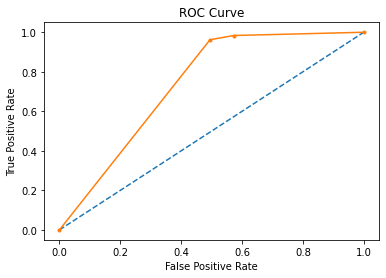

In [98]:
probs = best_grid_CART.predict_proba(X_train)
cart_train_auc,cart_train_fpr, cart_train_tpr, cart_train_thresholds=calc_AUC_ROC_curve(probs,train_labels)

#### AUC and ROC for the test data

In [99]:
# probs = best_grid_CART.predict_proba(X_test)
# cart_test_auc,cart_test_fpr, cart_test_tpr, cart_test_thresholds=calc_AUC_ROC_curve(probs,test_labels)

### Confusion Matrix for the Training data

In [100]:
from sklearn.metrics import classification_report,confusion_matrix

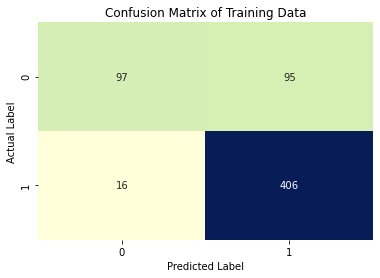

In [101]:
sns.heatmap(confusion_matrix(train_labels, ytrain_predict_CART), annot =True, cmap='YlGnBu', fmt='d', cbar =False).set(Title='Confusion Matrix of Training Data',xlabel='Predicted Label', ylabel='Actual Label');

#### Classification Report for Training data

In [102]:
print (classification_report(train_labels,ytrain_predict_CART))

              precision    recall  f1-score   support

           0       0.86      0.51      0.64       192
           1       0.81      0.96      0.88       422

    accuracy                           0.82       614
   macro avg       0.83      0.73      0.76       614
weighted avg       0.83      0.82      0.80       614



In [103]:
cart_metrics=classification_report(train_labels, ytrain_predict_CART,output_dict=True)
df2_metrics=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df2_metrics.loc["1"][2],2)
cart_train_recall=round(df2_metrics.loc["1"][1],2)
cart_train_precision=round(df2_metrics.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.81
cart_train_recall  0.96
cart_train_f1  0.88


### Confusion Matrix for the Testing data

In [104]:
# sns.heatmap(confusion_matrix(test_labels, ytest_predict_CART), annot =True, cmap='YlGnBu', fmt='d', cbar =False).set(Title='Confusion Matrix of Testing Data',xlabel='Predicted Label', ylabel='Actual Label');

#### Classification Report for Testing data

In [105]:
# print (classification_report(test_labels,ytest_predict_CART))

In [106]:
# cart_metrics=classification_report(test_labels, ytest_predict_CART,output_dict=True)
# df2_metrics=pd.DataFrame(cart_metrics).transpose()
# cart_test_precision=round(df2_metrics.loc["1"][0],2)
# cart_test_recall=round(df2_metrics.loc["1"][1],2)
# cart_test_f1=round(df2_metrics.loc["1"][2],2)
# print ('cart_test_precision ',cart_test_precision)
# print ('cart_test_recall ',cart_test_recall)
# print ('cart_test_f1 ',cart_test_f1)

### CART Conclusion

# Ensemble RandomForest Classifier

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
rfcl = RandomForestClassifier(random_state=1)

In [113]:
cv_value=3
param_grid = {
    'max_depth': [6, 10],
    'max_features': [5, 10],
    'min_samples_leaf': [36, 50],
    'min_samples_split': [140, 170],
    'n_estimators': [501]
}

grid_search = run_gridsearch(rfcl,param_grid,X_train, train_labels,cv_value)

check_performance(grid_search,X_train, X_validate, train_labels,validate_labels)


 Running grid search


 Showing best parameters for the grid search

{'max_depth': 6, 'max_features': 10, 'min_samples_leaf': 36, 'min_samples_split': 170, 'n_estimators': 501}

 Classification Report for Train dataset

              precision    recall  f1-score   support

           0       0.92      0.43      0.58       192
           1       0.79      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.86      0.71      0.73       614
weighted avg       0.83      0.81      0.78       614


 Classification Report for Validate dataset

              precision    recall  f1-score   support

           0       0.92      0.39      0.55        61
           1       0.77      0.98      0.86       124

    accuracy                           0.79       185
   macro avg       0.85      0.69      0.71       185
weighted avg       0.82      0.79      0.76       185



In [114]:
param_grid = {
    'max_depth': [6,7],
    'max_features': [6, 7],
    'min_samples_leaf': [36,46],
    'min_samples_split': [130,135],
    'n_estimators': [501]
}
grid_search = run_gridsearch(rfcl,param_grid,X_train, train_labels,cv_value)
check_performance(grid_search,X_train, X_validate, train_labels,validate_labels)


 Running grid search


 Showing best parameters for the grid search

{'max_depth': 6, 'max_features': 7, 'min_samples_leaf': 36, 'min_samples_split': 130, 'n_estimators': 501}

 Classification Report for Train dataset

              precision    recall  f1-score   support

           0       0.92      0.43      0.58       192
           1       0.79      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.86      0.71      0.73       614
weighted avg       0.83      0.81      0.78       614


 Classification Report for Validate dataset

              precision    recall  f1-score   support

           0       0.92      0.39      0.55        61
           1       0.77      0.98      0.86       124

    accuracy                           0.79       185
   macro avg       0.85      0.69      0.71       185
weighted avg       0.82      0.79      0.76       185



In [115]:
param_grid = {
    'max_depth': [4,5,6],
    'max_features': [4,5],
    'min_samples_leaf': [2,4],
    'min_samples_split': [30,35],
    'oob_score': [True],
    'n_estimators': [500]
}
grid_search = run_gridsearch(rfcl,param_grid,X_train, train_labels,cv_value)
check_performance(grid_search,X_train, X_validate, train_labels,validate_labels)


 Running grid search


 Showing best parameters for the grid search

{'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 35, 'n_estimators': 500, 'oob_score': True}

 Classification Report for Train dataset

              precision    recall  f1-score   support

           0       0.89      0.49      0.64       192
           1       0.81      0.97      0.88       422

    accuracy                           0.82       614
   macro avg       0.85      0.73      0.76       614
weighted avg       0.83      0.82      0.81       614


 Classification Report for Validate dataset

              precision    recall  f1-score   support

           0       0.91      0.48      0.62        61
           1       0.79      0.98      0.87       124

    accuracy                           0.81       185
   macro avg       0.85      0.73      0.75       185
weighted avg       0.83      0.81      0.79       185



After several trials, we are not getting any better results from the model. So we are stopping here

#### Saving the results of best search grid 

In [116]:
best_grid_RF = grid_search.best_estimator_
ytrain_predict_RF = best_grid_RF.predict(X_train)
ytest_predict_RF = best_grid_RF.predict(X_test)


In [117]:
ytest_predict_RF

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [118]:
ytest_predict_RF.shape

(367,)

In [119]:
df_test_bkp["Loan_Status"] = ytest_predict_RF

In [120]:
df_test_bkp.Loan_Status = df_test_bkp.Loan_Status.replace(to_replace = 0, value ='N')
df_test_bkp.Loan_Status = df_test_bkp.Loan_Status.replace(to_replace = 1, value ='Y')

In [121]:
df_test_bkp[["Loan_ID","Loan_Status"]].to_csv('Practice_Hackathon_Loan_Raghav_submission2.csv',index=False)

### Variable Importance

In [122]:
df2_fi=pd.DataFrame(best_grid_RF.feature_importances_*100, columns = ["Important Feature"], index = X_train.columns).sort_values('Important Feature',ascending=False)
df2_fi

,Important Feature
Credit_History,71.056987
total_income_by_loanAmt,14.000802
ApplicantIncome_by_loanAmt,5.747069
EMI,4.733626
Property_Area,1.986969
Married,1.249537
Dependents,0.611901
Education,0.449443
Gender,0.122393
Self_Employed,0.041273


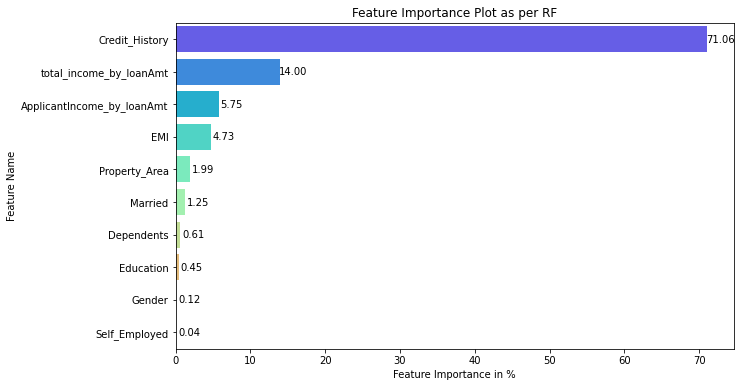

In [123]:
plt.figure(figsize=(10,6))
plots=sns.barplot(data=df2_fi,x="Important Feature",y=df2_fi.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot as per RF')

# Iterrating over the bars one-by-one 
for bar in plots.patches: 
      #print ('bar_width:', format(bar.get_width(), '.2f'),'bar_height:' , bar.get_height(), 'get_x:', bar.get_x() ,'get_y', bar.get_y() )
      plots.annotate(format(bar.get_width(), '.2f'), (bar.get_width() , bar.get_y() + bar.get_height()/2),
                   ha='center', va='center', 
                   size=10, xytext=(13, 0), 
                   textcoords='offset points') 
plt.show()

#### As per this model, attributes like Type, Commission, Channel and Destination have no imortance in predicting the insurance claims

## Model Evaluation

### Model Score

#### Model score for the Training Data

In [124]:
#Train Data Accuracy
rf_train_acc=best_grid_RF.score(X_train,train_labels)
rf_train_acc

0.8224755700325733

#### Model score for the Testing Data

In [125]:
#Test Data Accuracy
# rf_test_acc=best_grid.score(X_test,test_labels)
# rf_test_acc

#### Out of Bag Score for Model

In [126]:
print(best_grid_RF.oob_score_)

0.8175895765472313


#### Error rate

In [127]:
## What is the error rate
(1-best_grid_RF.oob_score_)*100

18.24104234527687

### Measuring AUC-ROC Curve

#### AUC and ROC for the training data

AUC: 0.868


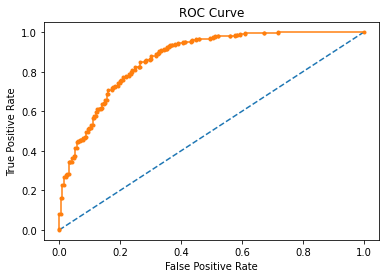

In [128]:
probs = best_grid_RF.predict_proba(X_train)
rf_train_auc,rf_train_fpr, rf_train_tpr,rf_train_threshholds=calc_AUC_ROC_curve(probs,train_labels)

#### AUC and ROC for the test data

In [129]:
# probs = best_grid.predict_proba(X_test)
# rf_test_auc,rf_test_fpr, rf_test_tpr,rf_test_thresholds=calc_AUC_ROC_curve(probs,test_labels)

### Confusion Matrix for the Training data

In [130]:
from sklearn.metrics import classification_report,confusion_matrix

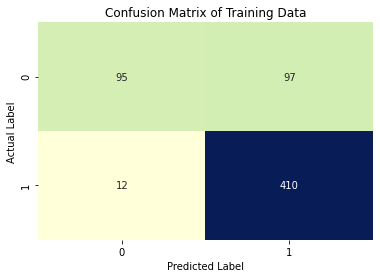

In [131]:
sns.heatmap(confusion_matrix(train_labels, ytrain_predict_RF), annot =True, cmap='YlGnBu', fmt='d', cbar =False).set(Title='Confusion Matrix of Training Data',xlabel='Predicted Label', ylabel='Actual Label');

#### Classification Report for Training data

In [132]:
print (classification_report(train_labels,ytrain_predict_RF))

              precision    recall  f1-score   support

           0       0.89      0.49      0.64       192
           1       0.81      0.97      0.88       422

    accuracy                           0.82       614
   macro avg       0.85      0.73      0.76       614
weighted avg       0.83      0.82      0.81       614



In [133]:
rf_metrics=classification_report(train_labels, ytrain_predict_RF,output_dict=True)
df2_metrics=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df2_metrics.loc["1"][0],2)
rf_train_recall=round(df2_metrics.loc["1"][1],2)
rf_train_f1=round(df2_metrics.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.81
rf_train_recall  0.97
rf_train_f1  0.88


### Confusion Matrix for the Testing data

In [134]:
# sns.heatmap(confusion_matrix(test_labels, ytest_predict_RF), annot =True, cmap='YlGnBu', fmt='d', cbar =False).set(Title='Confusion Matrix of Testing Data',xlabel='Predicted Label', ylabel='Actual Label');

#### Classification Report for Testing data

In [135]:
# print (classification_report(test_labels,ytest_predict_RF))

In [136]:
# rf_metrics=classification_report(test_labels, ytest_predict_RF,output_dict=True)
# df2_metrics=pd.DataFrame(rf_metrics).transpose()
# rf_test_precision=round(df2_metrics.loc["1"][0],2)
# rf_test_recall=round(df2_metrics.loc["1"][1],2)
# rf_test_f1=round(df2_metrics.loc["1"][2],2)
# print ('rf_test_precision ',rf_test_precision)
# print ('rf_test_recall ',rf_test_recall)
# print ('rf_test_f1 ',rf_test_f1)

### Random Forest Conclusion

## MLP Classifier (Artificial Neural Network)

In [137]:
from sklearn.neural_network import MLPClassifier

In [138]:
from sklearn.preprocessing import StandardScaler

### Scaling the test and train data for Neural Networks

In [139]:
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)
X_validates = sc.transform (X_validate)

In [140]:
X_trains

array([[ 0.47234264, -1.37208932, -0.73780632, ..., -0.23130483,
        -0.14581136,  0.1812328 ],
       [ 0.47234264,  0.72881553,  0.25346957, ..., -0.23130483,
        -0.09563382, -0.10686491],
       [ 0.47234264,  0.72881553, -0.73780632, ..., -0.56852074,
        -0.15220137,  0.17421965],
       ...,
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.44856597,
        -0.48662871, -0.2204524 ],
       [ 0.47234264,  0.72881553,  1.24474546, ...,  0.08959419,
        -0.28234764,  0.03138163],
       [-2.11710719, -1.37208932, -0.73780632, ..., -0.20410999,
        -0.44403459, -0.14607288]])

In [141]:
X_tests

array([[ 0.47234264,  0.72881553, -0.73780632, ..., -0.32920622,
         0.02151623,  0.36487802],
       [ 0.47234264,  0.72881553,  0.25346957, ..., -0.24218276,
        -0.39470132, -0.43869491],
       [ 0.47234264,  0.72881553,  1.24474546, ...,  0.20381248,
        -0.49091355, -0.44959581],
       ...,
       [ 0.47234264, -1.37208932, -0.73780632, ..., -0.24218276,
        -0.25420684, -0.39847002],
       [ 0.47234264,  0.72881553, -0.73780632, ..., -0.06813584,
        -0.11672792, -0.22801321],
       [ 0.47234264, -1.37208932, -0.73780632, ...,  0.13854489,
         1.13295429,  1.58470252]])

In [142]:
X_validates

array([[ 0.47234264, -1.37208932,  0.25346957, ...,  0.13854489,
         0.16477908,  0.52211174],
       [-2.11710719,  0.72881553, -0.73780632, ..., -0.37271795,
        -0.4010452 , -0.28822556],
       [ 0.47234264, -1.37208932, -0.73780632, ..., -0.6718611 ,
         0.3428219 , -0.03424252],
       ...,
       [ 0.47234264,  0.72881553, -0.73780632, ..., -0.51957005,
        -0.50928753, -0.21768923],
       [ 0.47234264,  0.72881553, -0.73780632, ...,  0.24732422,
        -0.5568387 , -1.01157197],
       [ 0.47234264,  0.72881553, -0.73780632, ...,  0.01344866,
        -0.39560962, -0.52547332]])

### Running the grid search for Neural Network

In [143]:
ann = MLPClassifier(random_state=1)
cv_value=3


In [144]:
# second submission
param_grid = {
    'hidden_layer_sizes': [(100,100,100),500],
    'activation': [ 'relu'],  #'logistic',
    'solver': ['adam'], # 'sgd', 
    'tol': [0.01,0.001],
    'max_iter' : [10000],
    'verbose':[True]
}

grid_search = run_gridsearch(ann,param_grid,X_trains, train_labels,cv_value)

check_performance(grid_search,X_trains, X_validates, train_labels,validate_labels)




 Running grid search

Iteration 1, loss = 0.63333764
Iteration 2, loss = 0.59266726
Iteration 3, loss = 0.56467819
Iteration 4, loss = 0.54431705
Iteration 5, loss = 0.52589065
Iteration 6, loss = 0.51094859
Iteration 7, loss = 0.49872312
Iteration 8, loss = 0.48986105
Iteration 9, loss = 0.48397031
Iteration 10, loss = 0.47877181
Iteration 11, loss = 0.47423211
Iteration 12, loss = 0.47067049
Iteration 13, loss = 0.46718464
Iteration 14, loss = 0.46520710
Iteration 15, loss = 0.46341962
Iteration 16, loss = 0.46201985
Iteration 17, loss = 0.46076288
Iteration 18, loss = 0.45990270
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.

 Showing best parameters for the grid search

{'activation': 'relu', 'hidden_layer_sizes': 500, 'max_iter': 10000, 'solver': 'adam', 'tol': 0.01, 'verbose': True}

 Classification Report for Train dataset

              precision    recall  f1-score   support

           0       0.92      0.43      0.58       192
    

#### Saving the results of best search grid 

In [145]:
best_grid_NN = grid_search.best_estimator_
ytrain_predict_ANN = best_grid_NN.predict(X_trains)
ytest_predict_ANN = best_grid_NN.predict(X_tests)


In [146]:
df_test_bkp["Loan_Status_NN1"] = ytest_predict_ANN

In [147]:
df_test_bkp.Loan_Status_NN1 = df_test_bkp.Loan_Status_NN1.replace(to_replace = 0, value ='N')
df_test_bkp.Loan_Status_NN1 = df_test_bkp.Loan_Status_NN1.replace(to_replace = 1, value ='Y')

In [148]:
#df_test_bkp[df_test_bkp["Loan_Status_NN1"]-df_test_bkp["Loan_Status"] != 0]

In [149]:
df_test_bkp[["Loan_ID","Loan_Status_NN1"]].to_csv('Practice_Hackathon_Loan_Raghav_submission2.csv',index=False)

In [150]:
# df_test_bkp.to_excel('Practice_Hackathon_Attrition_Raghav_submission_comparison.xlsx',index=False)

## Model Evaluation

### Model Score

#### Model score for the Training Data

In [151]:
#Train Data Accuracy
nn_train_acc=best_grid_NN.score(X_trains,train_labels)
nn_train_acc

0.8094462540716613

#### Model score for the Testing Data

In [152]:
#Test Data Accuracy
# nn_test_acc=best_grid.score(X_tests,test_labels)
# nn_test_acc

### Measuring AUC-ROC Curve

#### AUC and ROC for the training data

AUC: 0.793


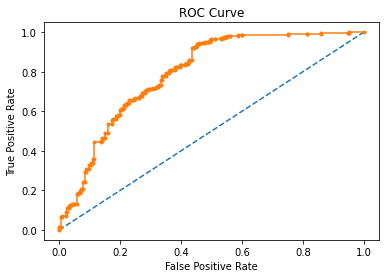

In [153]:
probs = best_grid_NN.predict_proba(X_trains)
nn_train_auc,nn_train_fpr, nn_train_tpr,nn_train_threshholds=calc_AUC_ROC_curve(probs,train_labels)

#### AUC and ROC for the test data

In [154]:
# probs = best_grid.predict_proba(X_tests)
# nn_test_auc,nn_test_fpr, nn_test_tpr,nn_test_threshholds=calc_AUC_ROC_curve(probs,test_labels)

### Confusion Matrix for the Training data

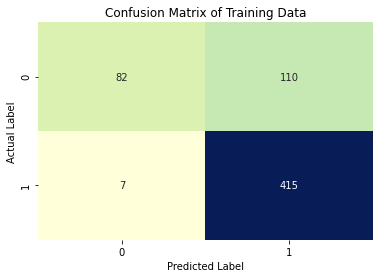

In [155]:
sns.heatmap(confusion_matrix(train_labels, ytrain_predict_ANN), annot =True, cmap='YlGnBu', fmt='d', cbar =False).set(Title='Confusion Matrix of Training Data',xlabel='Predicted Label', ylabel='Actual Label');

#### Classification Report for Training data

In [156]:
print (classification_report(train_labels,ytrain_predict_ANN))

              precision    recall  f1-score   support

           0       0.92      0.43      0.58       192
           1       0.79      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.86      0.71      0.73       614
weighted avg       0.83      0.81      0.78       614



In [157]:
nn_metrics=classification_report(train_labels, ytrain_predict_ANN,output_dict=True)
df2_metrics=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df2_metrics.loc["1"][0],2)
nn_train_recall=round(df2_metrics.loc["1"][1],2)
nn_train_f1=round(df2_metrics.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.79
nn_train_recall  0.98
nn_train_f1  0.88


### Confusion Matrix for the Testing data

In [158]:
# sns.heatmap(confusion_matrix(test_labels, ytest_predict_ANN), annot =True, cmap='YlGnBu', fmt='d', cbar =False).set(Title='Confusion Matrix of Testing Data',xlabel='Predicted Label', ylabel='Actual Label');

#### Classification Report for Testing data

In [159]:
# print (classification_report(test_labels,ytest_predict_ANN))

In [160]:
# nn_metrics=classification_report(test_labels, ytest_predict_ANN,output_dict=True)
# df2_metrics=pd.DataFrame(nn_metrics).transpose()
# nn_test_precision=round(df2_metrics.loc["1"][0],2)
# nn_test_recall=round(df2_metrics.loc["1"][1],2)
# nn_test_f1=round(df2_metrics.loc["1"][2],2)
# print ('nn_test_precision ',nn_test_precision)
# print ('nn_test_recall ',nn_test_recall)
# print ('nn_test_f1 ',nn_test_f1)

### XG Boost Model

In [107]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

## General Approach for Parameter Tuning


We will use an approach similar to that of GBM here. The various steps to be performed are:

1. Choose a relatively high learning rate. Generally a learning rate of 0.1 works but somewhere between 0.05 to 0.3 should work for different problems. Determine the optimum number of trees for this learning rate. XGBoost has a very useful function called as “cv” which performs cross-validation at each boosting iteration and thus returns the optimum number of trees required.

2. Tune tree-specific parameters ( max_depth, min_child_weight, gamma, subsample, colsample_bytree) for decided learning rate and number of trees. Note that we can choose different parameters to define a tree.

3. Tune regularization parameters (lambda, alpha) for xgboost which can help reduce model complexity and enhance performance.

4. Lower the learning rate and decide the optimal parameters .

In [108]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)


In [109]:
xgb1.fit( X_train, train_labels)

C:\Users\Raghav Gupta\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:29:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [110]:
xgb1.score(X_train,train_labels)

1.0

In [111]:
xgb1.score(X_validate,validate_labels)

1.0

In [112]:
def modelfit(alg, X_train, train_labels,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train.values, label=train_labels.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
          metrics='auc', early_stopping_rounds=early_stopping_rounds,verbose_eval=None)
        alg.set_params(n_estimators=cvresult.shape[0])
        print ("n_estimators:", cvresult.shape[0])

    #Fit the algorithm on the data
    alg.fit(X_train, train_labels,eval_metric='auc')
        
    #Predict training set:
    ytrain_predict = alg.predict(X_train)
    probs = alg.predict_proba(X_train)[:,1]
           
    #Print model report:
    print ("\nModel Report")
    print("\n Classification Report for Train dataset\n")
    print(classification_report(train_labels,ytrain_predict))
    
    # calculate AUC   
    auc = roc_auc_score(train_labels, probs)
    print('AUC Score (Train): %.3f' % auc)

                       
    # feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    # feat_imp.plot(kind='bar', title='Feature Importances')
    # plt.ylabel('Feature Importance Score')

In [113]:
#check_performance(xgb1,X_train, X_validate, train_labels,validate_labels)
modelfit(xgb1, X_train, train_labels)

n_estimators: 62

Model Report

 Classification Report for Train dataset

              precision    recall  f1-score   support

           0       0.96      0.70      0.81       192
           1       0.88      0.99      0.93       422

    accuracy                           0.90       614
   macro avg       0.92      0.84      0.87       614
weighted avg       0.90      0.90      0.89       614

AUC Score (Train): 0.980


## Step 2: Tune max_depth and min_child_weight

In [114]:
param_test1 = {
 'max_depth':range(3,15,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=46, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_train,train_labels)
gsearch1.best_params_, gsearch1.best_score_

[16:30:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Raghav Gupta\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


({'max_depth': 11, 'min_child_weight': 3}, 0.7895272305953421)

In [117]:
aram_test1 = {
 'max_depth':[10,11,12],
 'min_child_weight':[2,3,4]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=46, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_train,train_labels)
gsearch1.best_params_, gsearch1.best_score_

[16:31:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Raghav Gupta\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


({'max_depth': 11, 'min_child_weight': 3}, 0.7895272305953421)

## Step 3: Tune gamma

In [118]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=46, max_depth=11,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_train,train_labels)
gsearch1.best_params_, gsearch1.best_score_

[16:31:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Raghav Gupta\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


({'gamma': 0.0}, 0.7895272305953421)

In [119]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=11,
 min_child_weight=3,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb2, X_train,train_labels)

n_estimators: 84

Model Report

 Classification Report for Train dataset

              precision    recall  f1-score   support

           0       0.95      0.83      0.89       192
           1       0.93      0.98      0.95       422

    accuracy                           0.93       614
   macro avg       0.94      0.91      0.92       614
weighted avg       0.93      0.93      0.93       614

AUC Score (Train): 0.989


## Step 4: Tune subsample and colsample_bytree

In [120]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=120, max_depth=11,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
param_grid = param_test4, scoring='roc_auc',n_jobs=4, cv=5)
gsearch4.fit(X_train,train_labels)
gsearch4.best_params_, gsearch4.best_score_

C:\Users\Raghav Gupta\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:32:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'colsample_bytree': 0.6, 'subsample': 0.9}, 0.7873522418414058)

In [121]:
param_test4 = {
 'subsample':[0.8],
 'colsample_bytree':[0.9, 1,1.1]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=120, max_depth=11,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
param_grid = param_test4, scoring='roc_auc',n_jobs=4, cv=5)
gsearch4.fit(X_train,train_labels)
gsearch4.best_params_, gsearch4.best_score_

C:\Users\Raghav Gupta\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:32:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'colsample_bytree': 1, 'subsample': 0.8}, 0.7829134298793742)

In [122]:
param_test5 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(95,110,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=120, max_depth=11,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
param_grid = param_test5, scoring='roc_auc',n_jobs=4, cv=5)
gsearch5.fit(X_train,train_labels)
gsearch5.best_params_, gsearch5.best_score_

C:\Users\Raghav Gupta\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:32:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'colsample_bytree': 1.0, 'subsample': 0.8}, 0.7829134298793742)

## Step 5: Tuning Regularization Parameters

In [123]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=120, max_depth=11,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=1.0,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
param_grid = param_test6, scoring='roc_auc',n_jobs=4, cv=5)
gsearch6.fit(X_train,train_labels)
gsearch6.best_params_, gsearch6.best_score_

C:\Users\Raghav Gupta\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:32:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'reg_alpha': 1e-05}, 0.7829134298793742)

In [124]:
param_test7 = {
 'reg_alpha':[0, 0.00001, 0.00002, 0.00003, 0.00004]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=120, max_depth=11,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=1.0,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
param_grid = param_test7, scoring='roc_auc',n_jobs=4, cv=5)
gsearch7.fit(X_train,train_labels)
gsearch7.best_params_, gsearch5.best_score_

C:\Users\Raghav Gupta\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:32:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'reg_alpha': 0}, 0.7829134298793742)

In [125]:
xgb3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=11,
 min_child_weight=3,
 gamma=0,
 subsample=0.8,
 colsample_bytree=1.0,
 reg_alpha=0,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb3, X_train,train_labels)

n_estimators: 94

Model Report

 Classification Report for Train dataset

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       192
           1       0.94      0.98      0.96       422

    accuracy                           0.94       614
   macro avg       0.95      0.92      0.93       614
weighted avg       0.94      0.94      0.94       614

AUC Score (Train): 0.992


## Step 6: Reducing Learning Rate

In [126]:
param_test8 = {
 'learning_rate':[0.01, 0.04, 0.06, 0.08, 0.01],
 'n_estimators' :[90, 100, 110, 120, 130, 140, 150, 500]
}
gsearch8 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=120, max_depth=11,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=1.0,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
param_grid = param_test8, scoring='roc_auc',n_jobs=4, cv=5)
gsearch8.fit(X_train,train_labels)
gsearch8.best_params_, gsearch8.best_score_

C:\Users\Raghav Gupta\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:32:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'learning_rate': 0.06, 'n_estimators': 150}, 0.7918921549726503)

In [128]:
check_performance(gsearch8,X_train, X_validate, train_labels,validate_labels)
best_grid_XGB = gsearch8.best_estimator_
ytrain_predict_XGB = best_grid_XGB.predict(X_train)
ytest_predict_XGB = best_grid_XGB.predict(X_test)



 Classification Report for Train dataset

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       192
           1       0.93      0.98      0.96       422

    accuracy                           0.94       614
   macro avg       0.95      0.92      0.93       614
weighted avg       0.94      0.94      0.94       614


 Classification Report for Validate dataset

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        61
           1       0.95      0.99      0.97       124

    accuracy                           0.96       185
   macro avg       0.96      0.94      0.95       185
weighted avg       0.96      0.96      0.96       185



In [129]:
df_test_bkp["Loan_Status"] = ytest_predict_XGB

In [130]:
df_test_bkp.Loan_Status = df_test_bkp.Loan_Status.replace(to_replace = 0, value ='N')
df_test_bkp.Loan_Status = df_test_bkp.Loan_Status.replace(to_replace = 1, value ='Y')

In [131]:
df_test_bkp[["Loan_ID","Loan_Status"]].to_csv('Practice_Hackathon_Loan_Raghav_submission4.csv',index=False)

In [132]:
# files.download('Practice_Hackathon_Loan_Raghav_submission4.csv')